# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""

## 超參數設定
LEARNING_RATE = 1e-2
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.7
optmizer = [ ['SGD',    keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.7)],
             ['Adam',   keras.optimizers.Adam(lr=LEARNING_RATE, beta_1=0.9, beta_2=0.999, decay=0.0, amsgrad=False)],
             ['Adadelta', keras.optimizers.Adadelta(lr=1.0, rho=0.95, decay=0.0)],
             ['Adamax', keras.optimizers.Adamax(lr=LEARNING_RATE, beta_1=0.9, beta_2=0.999, decay=0.0)] ]



In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""
for opt_name, opt in optmizer:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with optmizer = ", opt_name)
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-optmizer-"+ opt_name
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with optmizer =  SGD
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [=========

50000/50000 [==============================] - 6s 128us/step - loss: 0.8806 - accuracy: 0.6917 - val_loss: 1.4187 - val_accuracy: 0.5261
Epoch 49/50
50000/50000 [==============================] - 6s 124us/step - loss: 0.8723 - accuracy: 0.6946 - val_loss: 1.5939 - val_accuracy: 0.4783
Epoch 50/50
50000/50000 [==============================] - 6s 121us/step - loss: 0.8632 - accuracy: 0.6996 - val_loss: 1.4147 - val_accuracy: 0.5249
Experiment with optmizer =  Adam
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_____________________________________________________

Epoch 46/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.4506 - accuracy: 0.4792 - val_loss: 1.5518 - val_accuracy: 0.4533
Epoch 47/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.4687 - accuracy: 0.4715 - val_loss: 1.5420 - val_accuracy: 0.4574
Epoch 48/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.4590 - accuracy: 0.4775 - val_loss: 1.5299 - val_accuracy: 0.4605
Epoch 49/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.4550 - accuracy: 0.4770 - val_loss: 1.5599 - val_accuracy: 0.4464
Epoch 50/50
50000/50000 [==============================] - 7s 144us/step - loss: 1.4462 - accuracy: 0.4816 - val_loss: 1.5416 - val_accuracy: 0.4563
Experiment with optmizer =  Adadelta
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
___

50000/50000 [==============================] - 8s 164us/step - loss: 0.7674 - accuracy: 0.7240 - val_loss: 1.8445 - val_accuracy: 0.4867
Epoch 44/50
50000/50000 [==============================] - 8s 164us/step - loss: 0.7504 - accuracy: 0.7299 - val_loss: 1.7684 - val_accuracy: 0.4926
Epoch 45/50
50000/50000 [==============================] - 8s 164us/step - loss: 0.7230 - accuracy: 0.7402 - val_loss: 1.7837 - val_accuracy: 0.5009
Epoch 46/50
50000/50000 [==============================] - 8s 164us/step - loss: 0.7132 - accuracy: 0.7460 - val_loss: 1.8961 - val_accuracy: 0.4803
Epoch 47/50
50000/50000 [==============================] - 8s 165us/step - loss: 0.7008 - accuracy: 0.7487 - val_loss: 1.8845 - val_accuracy: 0.4888
Epoch 48/50
50000/50000 [==============================] - 8s 164us/step - loss: 0.6744 - accuracy: 0.7576 - val_loss: 2.0638 - val_accuracy: 0.4661
Epoch 49/50
50000/50000 [==============================] - 8s 164us/step - loss: 0.6696 - accuracy: 0.7612 - val_loss:

Epoch 41/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.0186 - accuracy: 0.6306 - val_loss: 1.5819 - val_accuracy: 0.4884
Epoch 42/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.0217 - accuracy: 0.6323 - val_loss: 1.5859 - val_accuracy: 0.4865
Epoch 43/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.0075 - accuracy: 0.6352 - val_loss: 1.5700 - val_accuracy: 0.4940
Epoch 44/50
50000/50000 [==============================] - 7s 134us/step - loss: 0.9972 - accuracy: 0.6400 - val_loss: 1.5925 - val_accuracy: 0.4941
Epoch 45/50
50000/50000 [==============================] - 7s 134us/step - loss: 0.9817 - accuracy: 0.6482 - val_loss: 1.6337 - val_accuracy: 0.4908
Epoch 46/50
50000/50000 [==============================] - 7s 134us/step - loss: 0.9808 - accuracy: 0.6478 - val_loss: 1.6256 - val_accuracy: 0.4937
Epoch 47/50
50000/50000 [==============================] - 7s 135us/step - loss: 0.9598 - accuracy: 0.6543

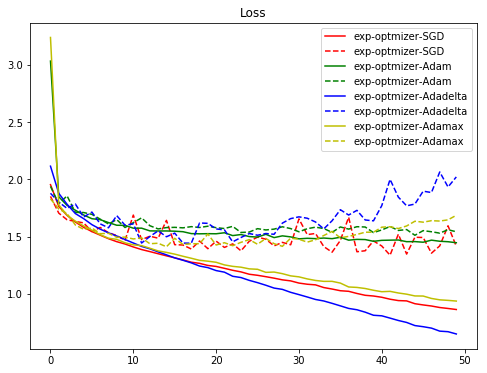

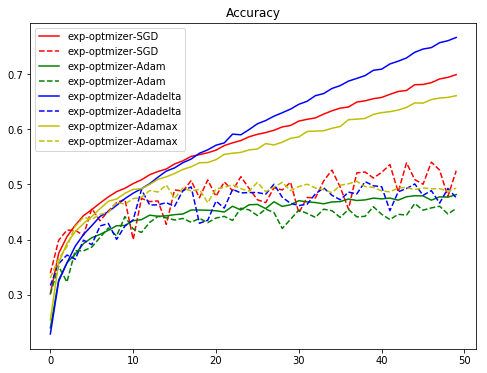

In [8]:

"""
將實驗結果繪出
"""

import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()